**EN3150 Assignment 01:** Learning from data and related
challenges and linear models for regression

210174X

Gallella M.M.H.H.B

ENTC

# 1 Data pre-processing

The diagram shows a dataset with feature vector X = <x1, x2> with 2 features and 0 to 100 samples.

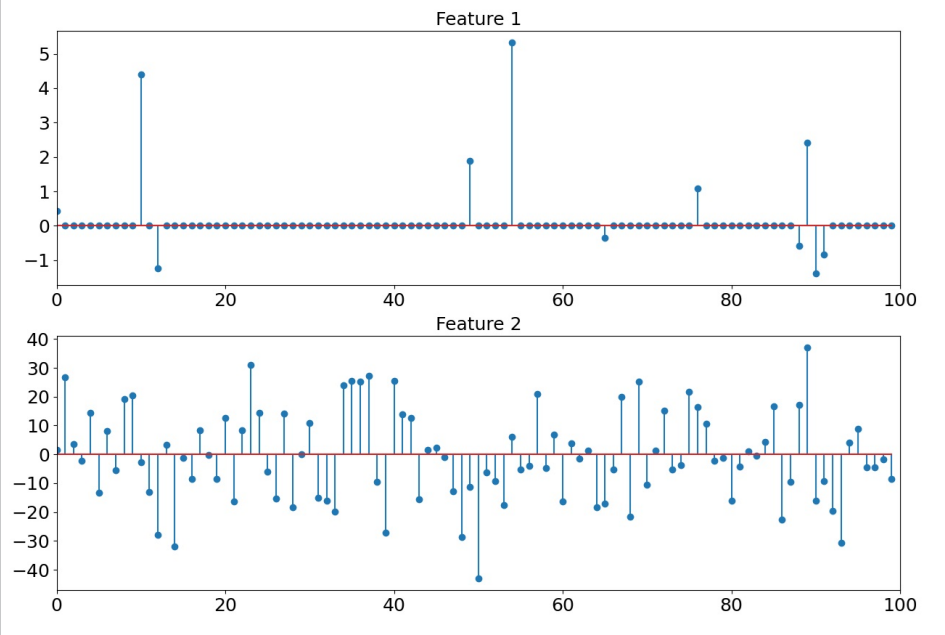

## **Answer:**

**(2) Max-Abs scaling** is the best scaling option for scale both x1 and x2 into a similar feature spaces with same range from [-1,1].

Special reasons:

*  Scaling shouldn't damage the negative-positive property which may a very important feature property (After scaling still negatives Should be negative and positives should be positive).

*  Both x1, x2 are already centered at zero (Shouldn't move the zeros to another value)

* x1 is [-1,5] range and x2 is [40,-40] range. After proper scaling both x1, x2 should be in the same scale; can't use Robust Scaling or Standard Scaling.


## **Overview of all the Scaling methods;**

### 1. **Min-Max Scaling**
- **Definition**: Min-max scaling (also known as normalization) transforms features by scaling them to a specific range; typically [0, 1].
- **Formula**:
  $$
  X' = \frac{X - X_{min}}{X_{max} - X_{min}}
  $$
  where $X$ is the original value, $X_{min}$is the minimum value in the feature, and $X_{max}$ is the maximum value in the feature.
- **Use Case**: Min-max scaling is useful when the features have different units or scales and you want to maintain the relationships between the data points.

### 2. **Max Abs Scaling**
- **Definition**: Max Abs scaling scales each feature by its maximum absolute value, transforming the data such that the values range between [-1, 1].
- **Formula**:
  $$
  X' = \frac{X}{\max(|X|)}
  $$
  where $\max(|X|)$ is the maximum absolute value of the feature.
- **Use Case**: This scaling is useful for data that is **already centered at zero** and is sparse, such as text data represented by word counts.

### 3. **Standard Scaling**
- **Definition**: Standard scaling (or standardization) transforms features by removing the mean and scaling to unit variance, resulting in the Z distribution with [ $\mu$ = 0, $\sigma$ = 1 ].
- **Formula**:
  $$
  X' = \frac{X - \mu}{\sigma}
  $$
  where $\mu$ is the mean of the feature and $\sigma$ is the standard deviation.
- **Use Case**: This scaling is useful when the data follows a Gaussian distribution $N [ \mu ,\sigma ]$ and when features have different units or scales.

### 4. **Robust Scaling**
- **Definition**: Robust scaling scales features using statistics that are **robust to outliers**, such as the median and the interquartile range (IQR).
- **Formula**:
  $$
  X' = \frac{X - \text{median}(X)}{\text{IQR}(X)}
  $$
  where the IQR = [Q1,Q2] is the difference between the 75th and 25th percentiles.
- **Use Case**: This scaling is particularly useful when the data contains many outliers, as it reduces the impact of extreme values.



# 2 Learning from data

## 2.1] Generate data.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Generate 100 samples
n_samples = 100

# Generate X values (uniformly distributed between 0 and 10)
X = 10 * np.random.rand(n_samples, 1)

# Generate epsilon values (normally distributed with mean 0 and standard deviation 15)
epsilon = np.random.normal(0, 15, n_samples)

# Generate Y values using the model Y = 3 + 2X + epsilon
Y = 3 + 2 * X + epsilon[:, np.newaxis]

Summary of the Generated Data;

- $X_i = 10 \cdot U_i$, where $U_i \sim \text{Uniform}(0, 1)$  $\text{ for}\quad i= 1, 2, \dots, 100$
- $ \epsilon_i \sim \mathcal{N}(0, 15^2) $
- $ Y_i = 3 + 2X_i + \epsilon_i $

The dataset consists of 100 points $ (X_i, Y_i) $, where $ X_i $ is uniformly distributed between 0 and 10, and $ Y_i $ is generated by the linear model with added Gaussian noise $ \epsilon_i $.

## 2. Run the code given in listing 2 multiple times and write down your observation. Why training and testing data is different in each run?

### 2.2.1] If random_state=r is a fixed value we'll endup getting the same data plot for training and testing data in each run.


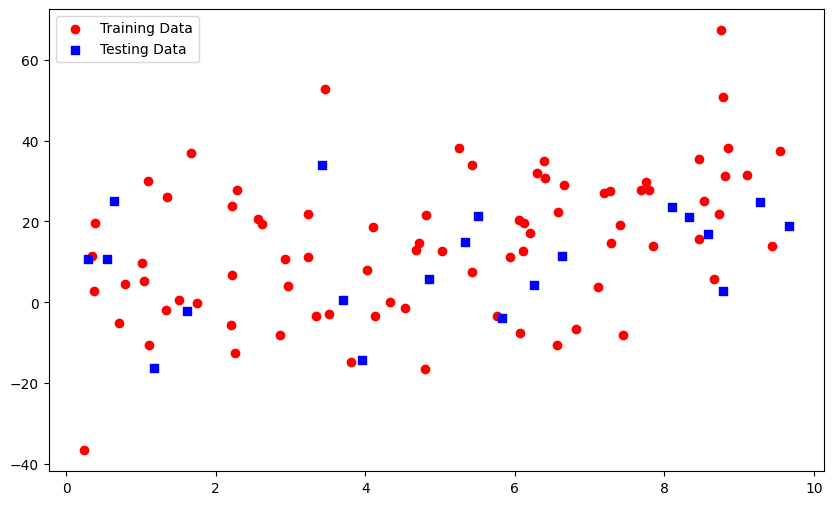

In [ ]:
r =4

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=r)

# Plot the data points
plt.figure(figsize=(10, 6))
plt.scatter(X_train, Y_train, alpha=1, marker='o', color='red', label='Training Data')
plt.scatter(X_test, Y_test, alpha=1, marker='s', color='blue', label='Testing Data')
plt.legend()
plt.show()


### 2.2.2] If random_state=r is a random value we'll endup getting different plots  for training and testing data each time we run the code.

In [6]:
r = np.random.randint(104)
print(r)

29


In [7]:
r = np.random.randint(104)
print(r)

71


The above code generates a random integer between 0 and 103 using `np.random.randint(104)` in each run.

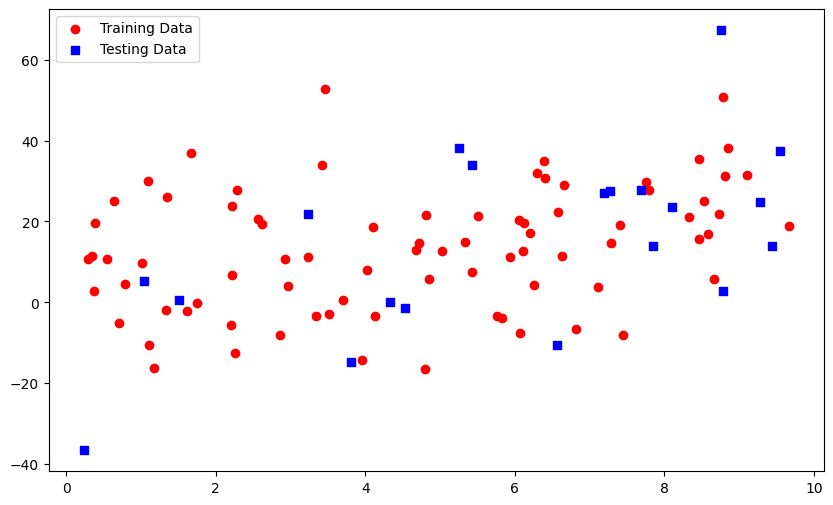

In [ ]:
# Generate a random integer as the seed for reproducibility
r = np.random.randint(104)

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=r)

# Plot the data points
plt.figure(figsize=(10, 6))
plt.scatter(X_train, Y_train, alpha=1, marker='o', color='red', label='Training Data')
plt.scatter(X_test, Y_test, alpha=1, marker='s', color='blue', label='Testing Data')
plt.legend()
plt.show()

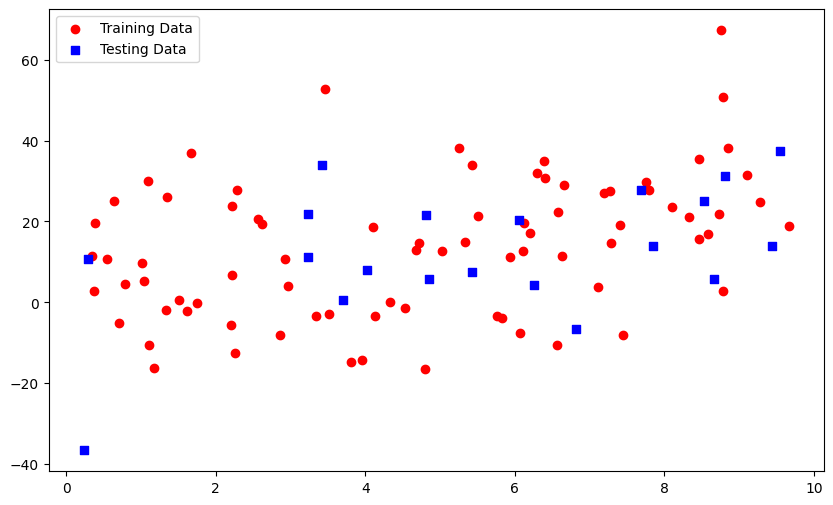

In [ ]:
# Generate a random integer as the seed for reproducibility
r = np.random.randint(104)

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=r)

# Plot the data points
plt.figure(figsize=(10, 6))
plt.scatter(X_train, Y_train, alpha=1, marker='o', color='red', label='Training Data')
plt.scatter(X_test, Y_test, alpha=1, marker='s', color='blue', label='Testing Data')
plt.legend()
plt.show()

**Observation:** When we run multiple times, train_test_split generates different train and test data splits based on the random seed from r = np.random.randint(104) build differen splits, in seed state between [0,103]

## 2.3]  Fitting linear regression model to each train_test_split generated through different random seeds.

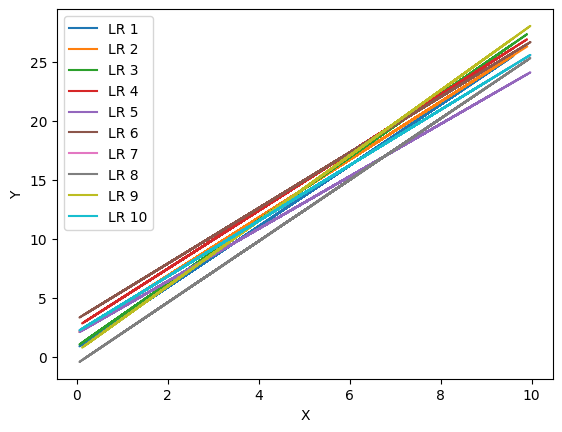

In [ ]:
# Plotting 10 different instances
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=np.random.randint(104))

    # Building the model
    model = LinearRegression()
    # Train the model
    model.fit(X_train, Y_train)

    # Predict on the training data
    Y_pred_train = model.predict(X_train)

    # Plot the predictions
    plt.plot(X_train, Y_pred_train, label=f'LR {i+1}')


# Label the axes
plt.xlabel('X')
plt.ylabel('Y')

# Display the legend
plt.legend()
plt.show()


When running the linear regression model over 10 instances, the models vary because each time, a new training dataset is formed by randomly dividing the original data into training and testing sets. This random division impacts the resulting model parameters. Furthermore, since the dataset is relatively small (n_samples = 100), the limited data contributes to larger inconsistencies in model outcomes across different runs.

## 2.4] Observations After Increasing the Data Samples to 10,000

In [ ]:
# Generate 100 samples
n_samples = 10000
# Generate X values ( uniformly distributed between 0and 10)
X = 10 * np . random . rand ( n_samples , 1)
# Generate epsilon values ( normally distributed with mean 0 and standard deviation 15)
epsilon = np . random . normal (0 , 15 , n_samples )
# Generate Y values using the model Y = 3 + 3X + epsilon
Y = 3 + 2 * X + epsilon [: , np . newaxis ]

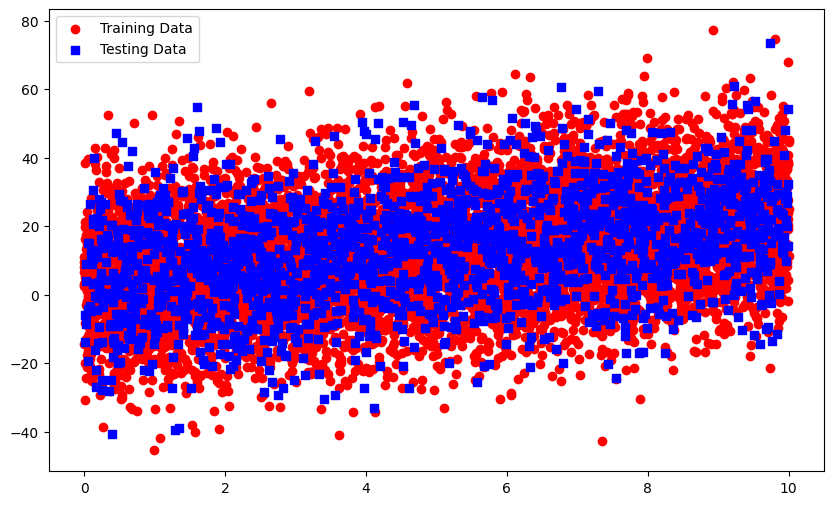

In [ ]:
# Generate a random integer as the seed for reproducibility
r = np.random.randint(104)

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=r)

# Plot the data points
plt.figure(figsize=(10, 6))
plt.scatter(X_train, Y_train, alpha=1, marker='o', color='red', label='Training Data')
plt.scatter(X_test, Y_test, alpha=1, marker='s', color='blue', label='Testing Data')
plt.legend()
plt.show()


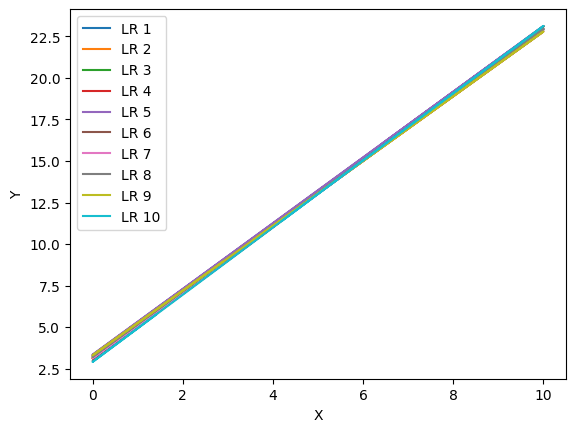

In [ ]:
# Plotting 10 different instances
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=np.random.randint(104))

    # Building the model
    model = LinearRegression()
    # Train the model
    model.fit(X_train, Y_train)

    # Predict on the training data
    Y_pred_train = model.predict(X_train)

    # Plot the predictions
    plt.plot(X_train, Y_pred_train, label=f'LR {i+1}')


# Label the axes
plt.xlabel('X')
plt.ylabel('Y')

# Display the legend
plt.legend()
plt.show()

**Observation**: When increasing the number of data samples to 10,000 (n_samples = 10000), the linear regression model becomes more stable and consistent across different instances of train-test data split. Compared to the 100 data samples, the variability in the model predictions decreases significantly because of optimal parameters. This is because with a larger dataset, the model can better capture the underlying patterns in the data, reducing the impact of random fluctuations from train-test splitting of the dataset. The larger sample size provides more data points for training, which results in more reliable model coefficients and improved generalization.

# 3] Linear regression on real world data

## 3.1] Load the dataset

Install ucimlrepo

In [9]:
! pip install ucimlrepo

Fetch the dataset

In [10]:
# If the package is not installed, install it using: pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# Fetch the dataset
infrared_thermography_temperature = fetch_ucirepo(id=925)

# Data (as pandas DataFrames)
X = infrared_thermography_temperature.data.features
y = infrared_thermography_temperature.data.targets

# Metadata
print(infrared_thermography_temperature.metadata)

# Variable information
print(infrared_thermography_temperature.variables)


{'uci_id': 925, 'name': 'Infrared Thermography Temperature', 'repository_url': 'https://archive.ics.uci.edu/dataset/925/infrared+thermography+temperature+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/925/data.csv', 'abstract': 'The Infrared Thermography Temperature Dataset contains temperatures read from various locations of inferred images about patients, with the addition of oral temperatures measured for each individual. The 33 features consist of gender, age, ethnicity, ambiant temperature, humidity, distance, and other temperature readings from the thermal images. The dataset is intended to be used in a regression task to predict the oral temperature using the environment information as well as the thermal image readings. ', 'area': 'Health and Medicine', 'tasks': ['Regression'], 'characteristics': ['Tabular'], 'num_instances': 1020, 'num_features': 33, 'feature_types': ['Real', 'Categorical'], 'demographics': ['Gender', 'Age', 'Ethnicity'], 'target_col': ['aveO

In [ ]:
print(type(X))

<class 'pandas.core.frame.DataFrame'>


X and y are Pandas DataFrame objects.

## 3.2] Independent and Dependent Variables in the data set

1] X DataFrame content;

In [ ]:
import pandas as pd

X.head()

,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,...,T_FHCC1,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1
0,Male,41-50,White,24.0,28.0,0.8,0.7025,35.0300,35.3775,34.4000,...,33.5775,33.4775,33.3725,33.4925,33.0025,34.5300,34.0075,35.6925,35.6350,35.6525
1,Female,31-40,Black or African-American,24.0,26.0,0.8,0.7800,34.5500,34.5200,33.9300,...,34.0325,34.0550,33.6775,33.9700,34.0025,34.6825,34.6600,35.1750,35.0925,35.1075
2,Female,21-30,White,24.0,26.0,0.8,0.8625,35.6525,35.5175,34.2775,...,34.9000,34.8275,34.6475,34.8200,34.6700,35.3450,35.2225,35.9125,35.8600,35.8850
3,Female,21-30,Black or African-American,24.0,27.0,0.8,0.9300,35.2225,35.6125,34.3850,...,34.4400,34.4225,34.6550,34.3025,34.9175,35.6025,35.3150,35.7200,34.9650,34.9825
4,Male,18-20,White,24.0,27.0,0.8,0.8950,35.5450,35.6650,34.9100,...,35.0900,35.1600,34.3975,34.6700,33.8275,35.4175,35.3725,35.8950,35.5875,35.6175


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gender       1020 non-null   object 
 1   Age          1020 non-null   object 
 2   Ethnicity    1020 non-null   object 
 3   T_atm        1020 non-null   float64
 4   Humidity     1020 non-null   float64
 5   Distance     1018 non-null   float64
 6   T_offset1    1020 non-null   float64
 7   Max1R13_1    1020 non-null   float64
 8   Max1L13_1    1020 non-null   float64
 9   aveAllR13_1  1020 non-null   float64
 10  aveAllL13_1  1020 non-null   float64
 11  T_RC1        1020 non-null   float64
 12  T_RC_Dry1    1020 non-null   float64
 13  T_RC_Wet1    1020 non-null   float64
 14  T_RC_Max1    1020 non-null   float64
 15  T_LC1        1020 non-null   float64
 16  T_LC_Dry1    1020 non-null   float64
 17  T_LC_Wet1    1020 non-null   float64
 18  T_LC_Max1    1020 non-null   float64
 19  RCC1  

2] y DataFrame contens;

In [ ]:
y.head()

,aveOralF,aveOralM
0,36.85,36.59
1,37.00,37.19
2,37.20,37.34
3,36.85,37.09
4,36.80,37.04


In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   aveOralF  1020 non-null   float64
 1   aveOralM  1020 non-null   float64
dtypes: float64(2)
memory usage: 16.1 KB


In [ ]:
print(X.shape, y.shape)

(1020, 33) (1020, 2)


### (3.2) Number of Independent and Dependent Variables in the data set **Answer:**

- **X Independent Variables:** 33 because there are 33 Data columns in DataFrame X.

- **Y Dependent Variables:** 2 because there are 2 Data columns in DataFrame y with float64.

- For both X and y there are 1020 data entries as rows which indicates we have 1020 samples to train and test.


### Let's have a look on the datapoint distributions, y1 and y2 against each feature x1,x2.........to get a better overview on data

In [11]:
import matplotlib.pyplot as plt

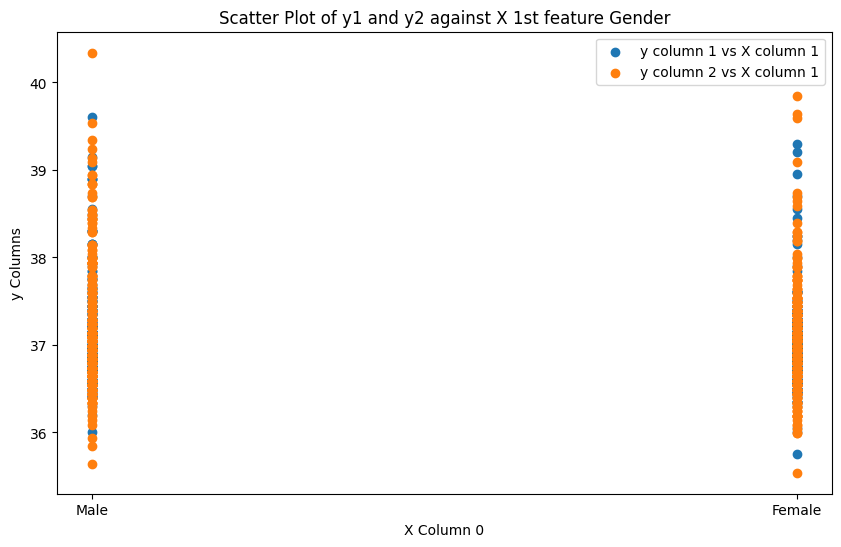

In [13]:
plt.figure(figsize=(10, 6))

plt.scatter(X.iloc[:, 0], y.iloc[:, 0], label='y column 1 vs X column 1')
plt.scatter(X.iloc[:, 0], y.iloc[:, 1], label='y column 2 vs X column 1')

plt.xlabel('X Column 0')
plt.ylabel('y Columns')
plt.legend()
plt.title('Scatter Plot of y1 and y2 against X 1st feature Gender')
plt.show()


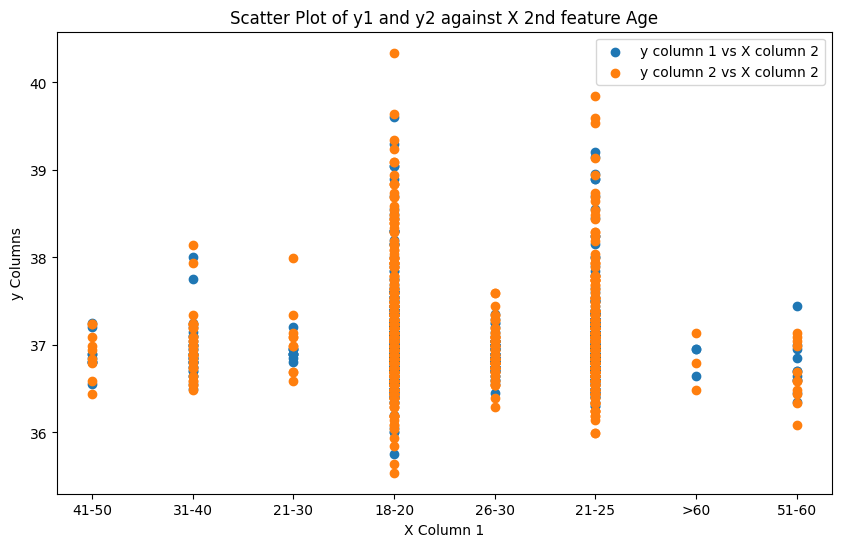

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(X.iloc[:, 1], y.iloc[:, 0], label='y column 1 vs X column 2')
plt.scatter(X.iloc[:, 1], y.iloc[:, 1], label='y column 2 vs X column 2')

plt.xlabel('X Column 1')
plt.ylabel('y Columns')
plt.legend()
plt.title('Scatter Plot of y1 and y2 against X 2nd feature Age')
plt.show()


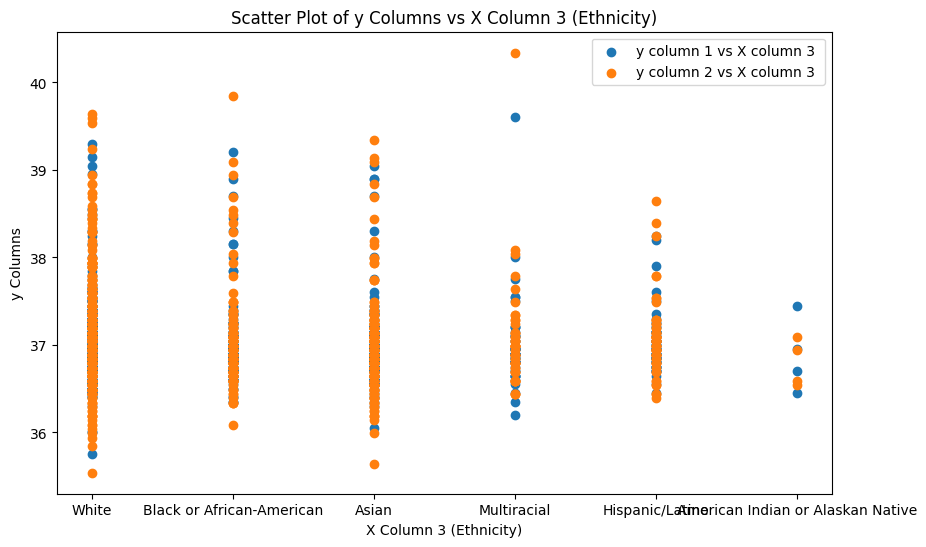

In [15]:
plt.figure(figsize=(10, 6))

plt.scatter(X.iloc[:, 2], y.iloc[:, 0], label='y column 1 vs X column 3 ')
plt.scatter(X.iloc[:, 2], y.iloc[:, 1], label='y column 2 vs X column 3 ')

plt.xlabel('X Column 3 (Ethnicity)')
plt.ylabel('y Columns')
plt.legend()
plt.title('Scatter Plot of y Columns vs X Column 3 (Ethnicity)')
plt.show()

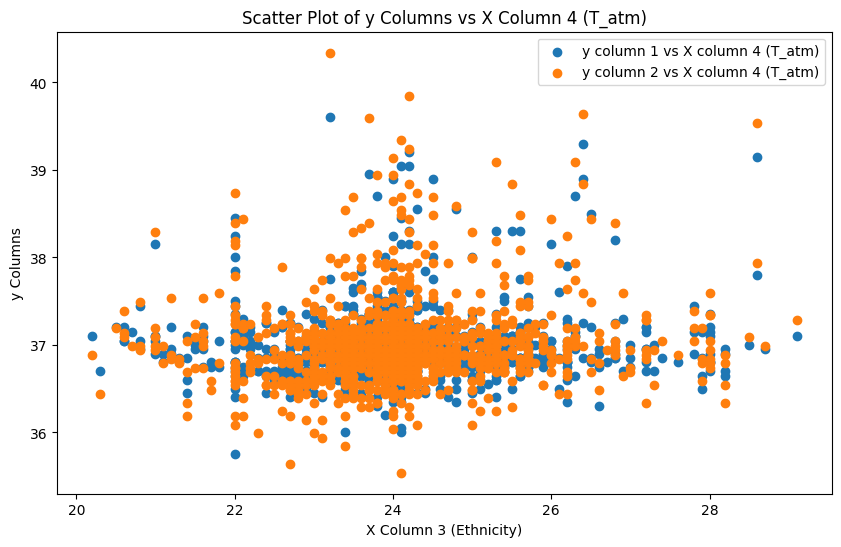

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(X.iloc[:, 3], y.iloc[:, 0], label='y column 1 vs X column 4 (T_atm)')
plt.scatter(X.iloc[:, 3], y.iloc[:, 1], label='y column 2 vs X column 4 (T_atm)')

plt.xlabel('X Column 3 (Ethnicity)')
plt.ylabel('y Columns')
plt.legend()
plt.title('Scatter Plot of y Columns vs X Column 4 (T_atm)')
plt.show()

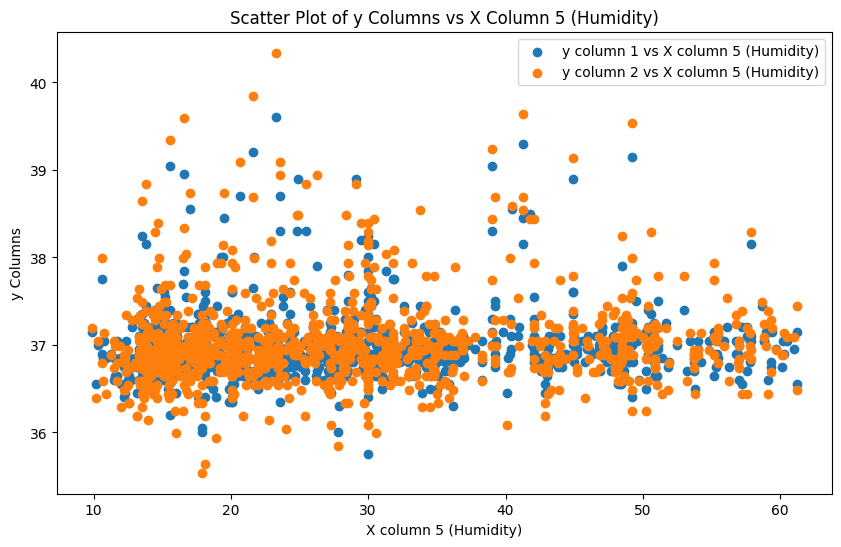

In [14]:
plt.figure(figsize=(10, 6))

plt.scatter(X.iloc[:, 4], y.iloc[:, 0], label='y column 1 vs X column 5 (Humidity)')
plt.scatter(X.iloc[:, 4], y.iloc[:, 1], label='y column 2 vs X column 5 (Humidity)')

plt.xlabel('X column 5 (Humidity)')
plt.ylabel('y Columns')
plt.legend()
plt.title('Scatter Plot of y Columns vs X Column 5 (Humidity)')
plt.show()

## 3.3 Feasibility of Applying Linear Regression

Not feasible to apply linear regression in this stage becase still,

- We didn't check for outliers
- Need to scale all the features into a same scale for better convergence in Gradient descend algorithms.
-The dataset contains categorical variables, such as:  (Categorical) Gender, Age, Ethnicity

Since linear regression works only with numerical data, it is necessary to transform these categorical variables into numerical format before proceeding. Two common methods to achieve this are:

- **One-Hot Encoding**: This technique generates binary columns for each category within the categorical variable. For instance, if the "Gender" feature has categories like "Male" and "Female", one-hot encoding would create two columns: "Gender Male" and "Gender Female", with binary values (0 or 1). The method `sklearn.preprocessing.OneHotEncoder` can be used to implement this.

- **Label Encoding**: This method assigns a distinct integer value to each category. For example, "Male" could be assigned as 0, and "Female" as 1. Although this method is simpler, it may create unintended ordinal relationships among the categories, which can be problematic for nominal variables.

## 3.4 Correcting NaN Handling Code

### **Wrongw Approach:**

In [ ]:
# Drop rows with missing values from both X and y
X = X.dropna()
y = y.dropna()

In [ ]:
X.shape

(1018, 33)

1018 data entries; therefore 2 data entries were removed

In [ ]:
y.shape

(1020, 2)

But here in y there's 1020 data entries

In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   aveOralF  1020 non-null   float64
 1   aveOralM  1020 non-null   float64
dtypes: float64(2)
memory usage: 16.1 KB


X has 1018 entrie but y has 1020 entrie

The given code snippet is not the correct approach to remove missing values from both `X` and `y`. Dropping rows with missing values independently from `X` and `y` can lead to a misalignment between the features and the corresponding target values, as the rows dropped from `X` might not correspond to the rows dropped from `y`.

### **Correct Approach:**

The correct approach is to drop rows where there are missing values in either `X` or `y`, ensuring that the data remains aligned. Here's how you can do it:

```python
# Combine X and y into a single DataFrame
data = pd.concat([X, y], axis=1)

# Drop rows with any missing values across all columns
data = data.dropna()

# Separate the combined data back into X and y
X = data.iloc[:, :-2]  # All columns except the last two
y = data.iloc[:, -2:]  # The last two columns (the two target columns)
```

### **Explanation:**

- **Combining X and y:** By concatenating `X` and `y` into a single DataFrame, you ensure that the features and corresponding target values stay together.
- **Dropping Missing Values:** Dropping rows with missing values from the combined DataFrame ensures that only the rows with complete data in both `X` and `y` are retained.
- **Separating X and y:** After removing the rows with missing data, you split the DataFrame back into `X` (features) and `y` (target).

This approach preserves the alignment between the features and their corresponding target values.

In [ ]:
# Combine X and y into a single DataFrame
data = pd.concat([X, y], axis=1)

# Drop rows with any missing values across all columns
data = data.dropna()

# Separate the combined data back into X and y
X = data.iloc[:, :-2]  # All columns except the last two
y = data.iloc[:, -2:]  # The last two columns (the two target columns)

In [ ]:
X.shape

(1018, 33)

In [ ]:
y.shape

(1018, 2)

Now the dataset is cleaned from NaN/missing values and we can clearly observe that X and y both have 1018 same size data entries.

## 3.5 Feature Selection

Select `Age` and four other features based on your preference.

Preparing the new DataFrame yM with the aveOralF

In [ ]:
y.head()

,aveOralF,aveOralM
0,36.85,36.59
1,37.00,37.19
2,37.20,37.34
3,36.85,37.09
4,36.80,37.04


In [ ]:
yM=y.drop(columns=["aveOralF"]) #features of our data set array
yM.head()

,aveOralM
0,36.59
1,37.19
2,37.34
3,37.09
4,37.04


yM is correct

Let's choose few features which seems to be better for the target, we can do a mean,std, and min,Q1,meadian,Q3,max analysis to choose features

In [ ]:
X.describe()

,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,T_RC_Dry1,...,T_FHCC1,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1
count,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,...,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000
mean,24.115815,28.749411,0.729784,0.968991,35.596374,35.611651,34.888828,35.012899,35.659874,35.587022,...,34.574980,34.568583,34.565945,34.488836,34.578310,35.422130,35.094648,36.084615,35.805225,35.837984
std,1.337617,13.070900,2.456486,0.362860,0.575436,0.550265,0.719114,0.633228,0.554440,0.569827,...,0.672177,0.669346,0.678941,0.667293,0.728353,0.523703,0.576283,0.492236,0.559755,0.559812
min,20.200000,9.900000,0.540000,-0.590000,33.897500,34.122500,31.770000,32.902500,33.985000,33.825000,...,31.050000,31.452500,31.657500,31.280000,31.150000,33.407500,32.440000,34.892500,33.802500,33.835000
25%,23.400000,17.600000,0.600000,0.772500,35.247500,35.270625,34.457500,34.655625,35.332500,35.248125,...,34.215000,34.181250,34.178125,34.097500,34.226875,35.118750,34.758125,35.775000,35.473125,35.500000
50%,24.000000,26.300000,0.620000,0.940000,35.547500,35.575000,34.915000,34.997500,35.602500,35.531250,...,34.607500,34.597500,34.602500,34.512917,34.622500,35.392500,35.100000,36.027500,35.788750,35.825000
75%,24.700000,36.200000,0.700000,1.140000,35.872500,35.884375,35.300000,35.364375,35.911875,35.856875,...,34.966875,34.969375,34.965000,34.879375,35.012500,35.675000,35.415000,36.280000,36.087500,36.121875
max,29.100000,61.200000,79.000000,2.875000,38.405000,38.042500,37.575000,37.680000,38.385000,38.380000,...,37.125000,37.075000,37.165000,37.212500,37.367500,38.002500,37.632500,38.807500,38.417500,38.455000


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1018 entries, 0 to 1019
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gender       1018 non-null   object 
 1   Age          1018 non-null   object 
 2   Ethnicity    1018 non-null   object 
 3   T_atm        1018 non-null   float64
 4   Humidity     1018 non-null   float64
 5   Distance     1018 non-null   float64
 6   T_offset1    1018 non-null   float64
 7   Max1R13_1    1018 non-null   float64
 8   Max1L13_1    1018 non-null   float64
 9   aveAllR13_1  1018 non-null   float64
 10  aveAllL13_1  1018 non-null   float64
 11  T_RC1        1018 non-null   float64
 12  T_RC_Dry1    1018 non-null   float64
 13  T_RC_Wet1    1018 non-null   float64
 14  T_RC_Max1    1018 non-null   float64
 15  T_LC1        1018 non-null   float64
 16  T_LC_Dry1    1018 non-null   float64
 17  T_LC_Wet1    1018 non-null   float64
 18  T_LC_Max1    1018 non-null   float64
 19  RCC1       

Here I decided to go with these features; "Age", "Distance" ,"T_offset1", "RCC1" , "LCC1"

In [ ]:
XM = X[["Age", "Distance" ,"T_offset1", "RCC1" , "LCC1"]]
XM.head()

,Age,Distance,T_offset1,RCC1,LCC1
0,41-50,0.8,0.7025,34.7850,34.4650
1,31-40,0.8,0.7800,34.3225,34.2400
2,21-30,0.8,0.8625,35.3575,35.0925
3,21-30,0.8,0.9300,34.9100,35.1700
4,18-20,0.8,0.8950,35.3550,35.1200


New ( XM, yM ) set seems to be better for the training session

In [ ]:
print(XM.shape, yM.shape)

(1018, 5) (1018, 1)


Analysis for outlier detection and feture scaling:

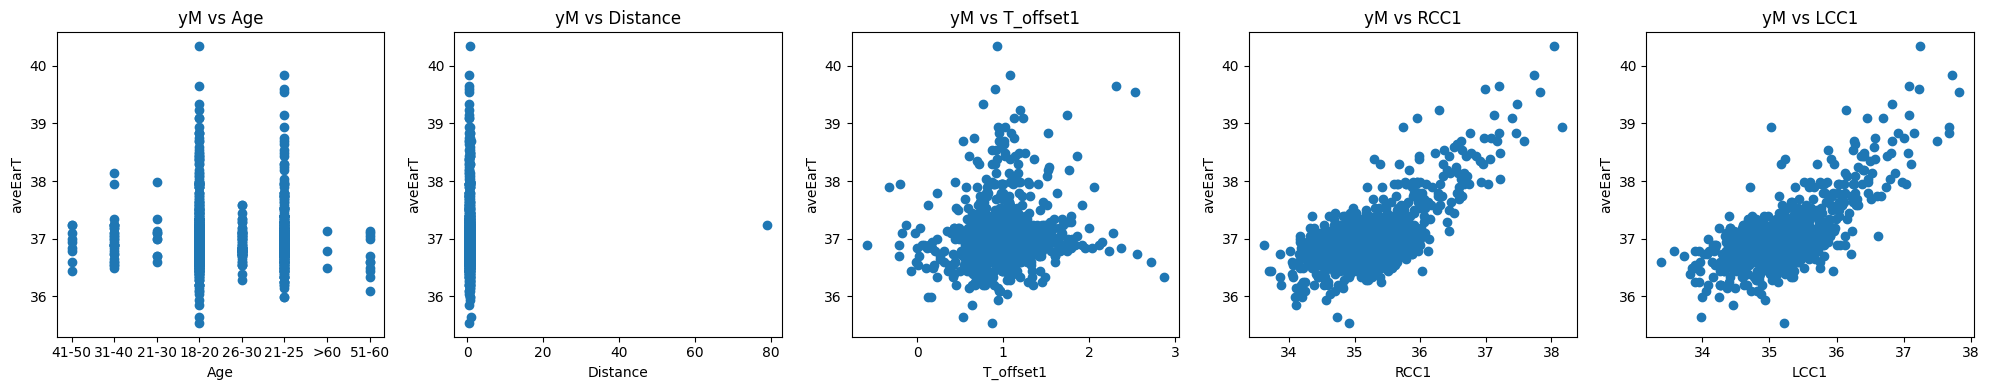

In [ ]:
# prompt: Give me 5 graphs which plots for y targets against X features x1, x2, x3,x4 and x5

# Plotting yM against each of the five features in XM
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for i, feature in enumerate(XM.columns):
  axes[i].scatter(XM[feature], yM)
  axes[i].set_xlabel(feature)
  axes[i].set_ylabel('aveEarT')
  axes[i].set_title(f'yM vs {feature}')

plt.tight_layout()
plt.show()


### Preparing the 1st feature "Age"

Preparing Age features: string to numpy.float64 conversion

In [ ]:
# Extract the x1 to a separate dataframe from XM

x1 = XM[["Age"]]
x1.head()


,Age
0,41-50
1,31-40
2,21-30
3,21-30
4,18-20


In [ ]:
x1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1018 entries, 0 to 1019
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Age     1018 non-null   object
dtypes: object(1)
memory usage: 15.9+ KB


In [ ]:
print(x1['Age'].unique())


['41-50' '31-40' '21-30' '18-20' '26-30' '21-25' '>60' '51-60']


In [ ]:
# prompt: To convert x1 object dtype to float64; for each row contains  41-50 give 45.5 float64, for each row contains 31-40 give 35.5 float64, for each row contains 21-30 give 25.5 float64, for each row contains 18-20 give 19 float64, for each row contains 26-30 give 28, for each row contains 21-25 give 23, for each row contains >60 give 65, for each row contains 51-60 give 55.5

def convert_age(age_str):
  if age_str == '41-50':
    return 45.5
  elif age_str == '31-40':
    return 35.5
  elif age_str == '21-30':
    return 25.5
  elif age_str == '18-20':
    return 19.0
  elif age_str == '26-30':
    return 28.0
  elif age_str == '21-25':
    return 23.0
  elif age_str == '>60':
    return 65.0
  elif age_str == '51-60':
    return 55.5
  else:
    return None  # Handle unexpected values if needed

x1['Age'] = x1['Age'].apply(convert_age)


x1.head()


<ipython-input-21-eeac38d08b20>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1['Age'] = x1['Age'].apply(convert_age)


,Age
0,45.5
1,35.5
2,25.5
3,25.5
4,19.0


In [ ]:
x1['Age'][1]

35.5

In [ ]:
type(x1['Age'][1])

numpy.float64

It is sucsessfuly converted in to numpy.float64

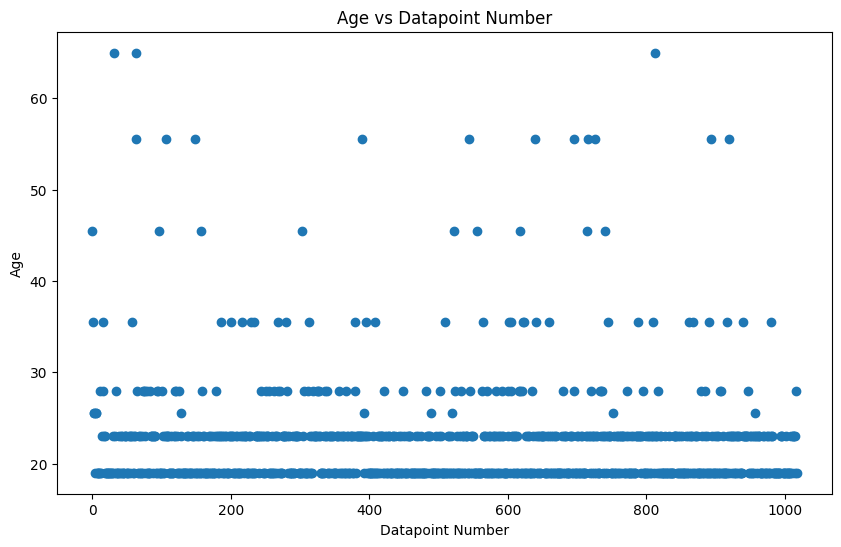

In [ ]:
# prompt: plot new x1 features against datapoint number from 0 to 1018 as a dot graph

plt.figure(figsize=(10, 6))
plt.plot(range(len(x1)), x1['Age'], 'o')
plt.xlabel('Datapoint Number')
plt.ylabel('Age')
plt.title('Age vs Datapoint Number')
plt.show()


Scale the  new 1st feature; Age = x1 with Min-Max-Scaling between 0 to 1 range, and plot scaled x1 feature in a plot against the datapoint number from 0 to 1018


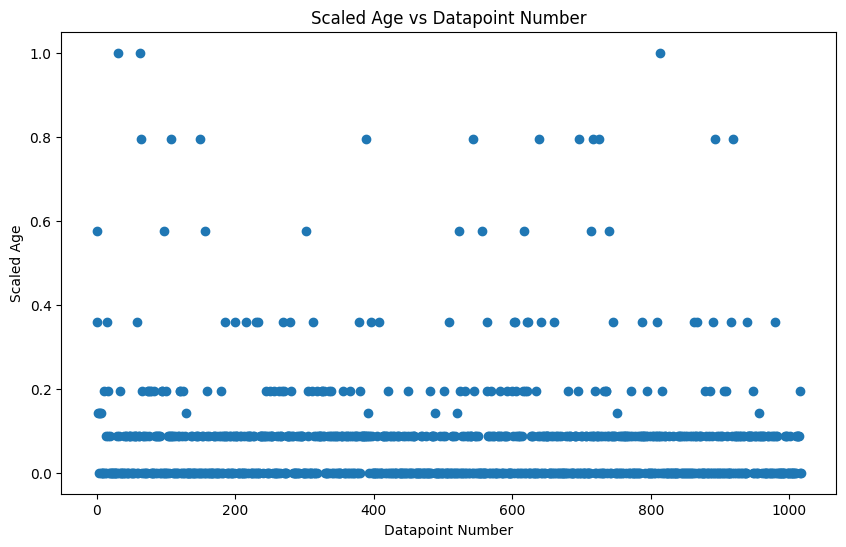

In [ ]:
#Scale the  new 1st feature; Age = x1 with Min-Max-Scaling between 0 to 1 range, and plot scaled x1 feature in a plot against the datapoint number from 0 to 1018

from sklearn.preprocessing import MinMaxScaler

# Reshape the data for the scaler (it expects a 2D array)
x1_values = x1['Age'].values.reshape(-1, 1)

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the data and transform it
x1_scaled = scaler.fit_transform(x1_values)

# Plot the scaled data
plt.figure(figsize=(10, 6))
plt.plot(range(len(x1_scaled)), x1_scaled, 'o')
plt.xlabel('Datapoint Number')
plt.ylabel('Scaled Age')
plt.title('Scaled Age vs Datapoint Number')
plt.show()


### Preparing the 2nd feature "Distance"

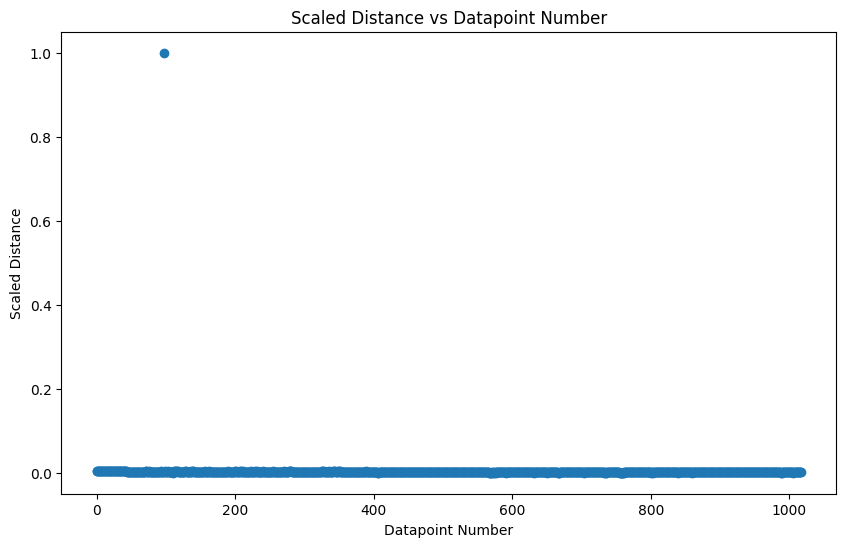

In [ ]:
# Scale the 2nd feature; Distance = x2 in XM with Min-Max-Scaling between 0 to 1 range, and plot scaled x2 feature in a plot against the datapoint number from 0 to 1018

# Extract the 'Distance' feature
x2 = XM['Distance'].values.reshape(-1, 1)  # Reshape for scaler

# Create a MinMaxScaler object (if not already created)
# scaler = MinMaxScaler()  # Uncomment if scaler not defined earlier

# Fit and transform the 'Distance' feature
x2_scaled = scaler.fit_transform(x2)

# Plot the scaled feature against datapoint number
plt.figure(figsize=(10, 6))
plt.scatter(range(len(x2_scaled)), x2_scaled)
plt.xlabel('Datapoint Number')
plt.ylabel('Scaled Distance')
plt.title('Scaled Distance vs Datapoint Number')
plt.show()


Clearely we have a one outlier which affected the scaling

Let's remove the outlier;

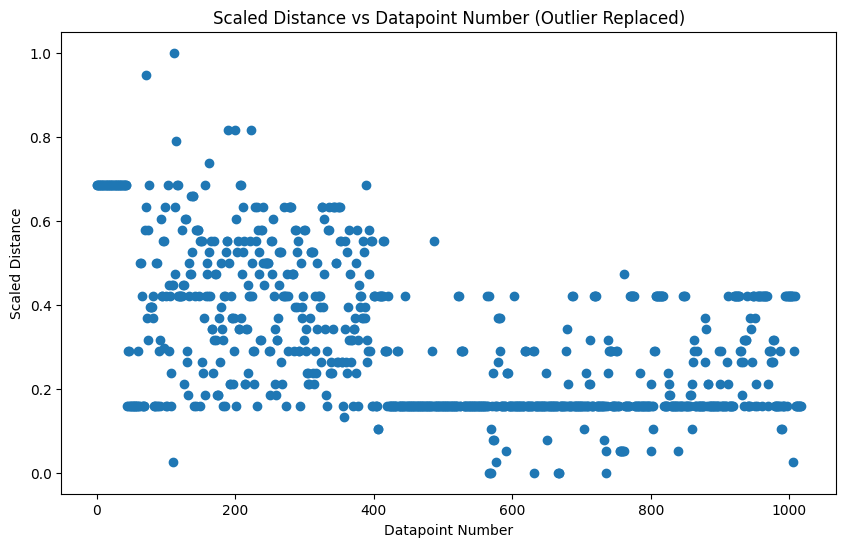

In [ ]:
# Identify the outlier index (where x2_scaled is very close to 1)
outlier_index = (x2_scaled > 0.99).flatten()

# Calculate the mean of non-outlier 'Distance' values
mean_distance = XM.loc[~outlier_index, 'Distance'].mean()

# Replace the outlier with the mean value
XM.loc[outlier_index, 'Distance'] = mean_distance

# Re-plot the updated data with another reshape in (-1,1)
x2_scaled_updated = scaler.fit_transform(XM['Distance'].values.reshape(-1, 1))
plt.figure(figsize=(10, 6))
plt.scatter(range(len(x2_scaled_updated)), x2_scaled_updated)
plt.xlabel('Datapoint Number')
plt.ylabel('Scaled Distance')
plt.title('Scaled Distance vs Datapoint Number (Outlier Replaced)')
plt.show()


In [ ]:
x2.shape

(1018, 1)

### Preparing the 3rd feature "T_offset1"

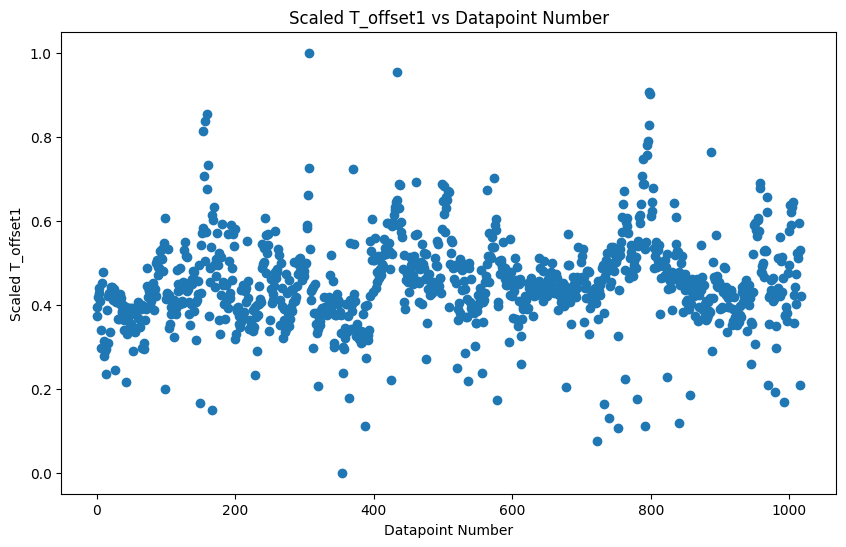

In [ ]:
# prompt: Scale the 3rd feature; T_offset1 = x3 in XM with Min-Max-Scaling between 0 to 1 range, and plot scaled x3 feature in a plot against the datapoint number from 0 to 1018

# Extract the 'T_offset1' feature
x3 = XM['T_offset1'].values.reshape(-1, 1)  # Reshape for scaler

# Create a MinMaxScaler object (if not already created)
# scaler = MinMaxScaler()  # Uncomment if scaler not defined earlier

# Fit and transform the 'T_offset1' feature
x3_scaled = scaler.fit_transform(x3)

# Plot the scaled feature against datapoint number
plt.figure(figsize=(10, 6))
plt.scatter(range(len(x3_scaled)), x3_scaled)
plt.xlabel('Datapoint Number')
plt.ylabel('Scaled T_offset1')
plt.title('Scaled T_offset1 vs Datapoint Number')
plt.show()


### Preparing the 4th feature "RCC1"

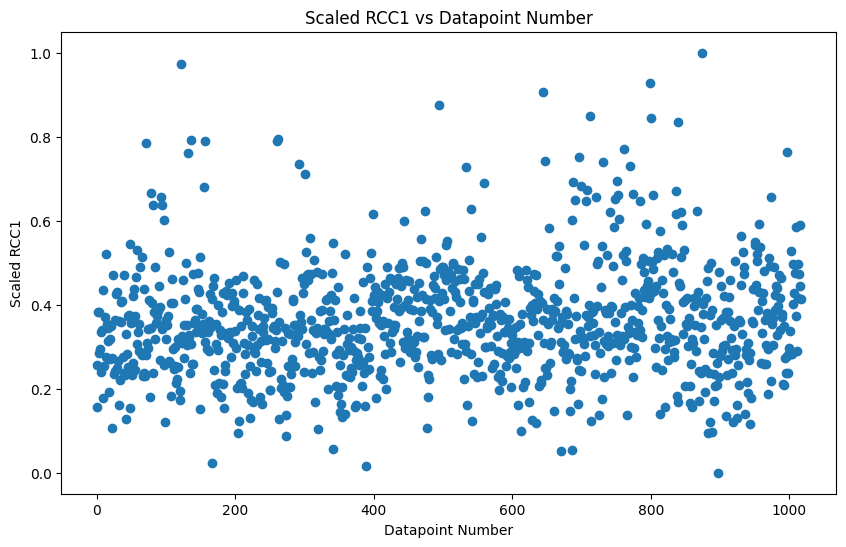

In [ ]:
# prompt: Scale the 4th feature; RCC1 = x4 in XM with Min-Max-Scaling between 0 to 1 range, and plot scaled x4 feature in a plot against the datapoint number from 0 to 1018

# Extract the 'RCC1' feature
x4 = XM['RCC1'].values.reshape(-1, 1)  # Reshape for scaler

# Create a MinMaxScaler object (if not already created)
# scaler = MinMaxScaler()  # Uncomment if scaler not defined earlier

# Fit and transform the 'RCC1' feature
x4_scaled = scaler.fit_transform(x4)

# Plot the scaled feature against datapoint number
plt.figure(figsize=(10, 6))
plt.scatter(range(len(x4_scaled)), x4_scaled)
plt.xlabel('Datapoint Number')
plt.ylabel('Scaled RCC1')
plt.title('Scaled RCC1 vs Datapoint Number')
plt.show()


### Preparing the 5th feature "LCC1"

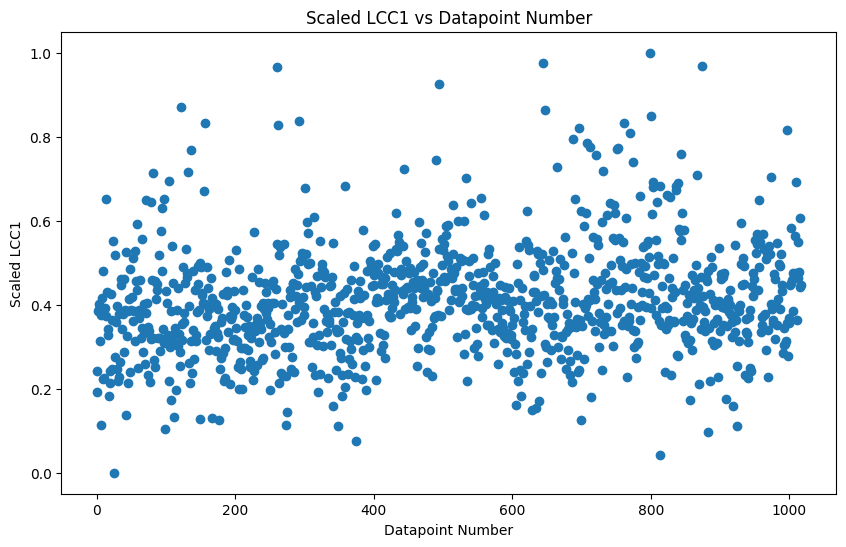

In [ ]:
# prompt: Scale the 5th feature; LCC1 = x5 in XM with Min-Max-Scaling between 0 to 1 range, and plot scaled x5 feature in a plot against the datapoint number from 0 to 1018

# Extract the 'LCC1' feature
x5 = XM['LCC1'].values.reshape(-1, 1)  # Reshape for scaler

# Create a MinMaxScaler object (if not already created)
# scaler = MinMaxScaler()  # Uncomment if scaler not defined earlier

# Fit and transform the 'LCC1' feature
x5_scaled = scaler.fit_transform(x5)

# Plot the scaled feature against datapoint number
plt.figure(figsize=(10, 6))
plt.scatter(range(len(x5_scaled)), x5_scaled)
plt.xlabel('Datapoint Number')
plt.ylabel('Scaled LCC1')
plt.title('Scaled LCC1 vs Datapoint Number')
plt.show()


In [ ]:
# prompt: Now combine scaled x1 to x5 features in to a new dataframe

# Create a new DataFrame from the scaled features
X_scaled_df = pd.DataFrame({
    'Age_scaled': x1_scaled.flatten(),
    'Distance_scaled': x2_scaled_updated.flatten(),
    'T_offset1_scaled': x3_scaled.flatten(),
    'RCC1_scaled': x4_scaled.flatten(),
    'LCC1_scaled': x5_scaled.flatten()
})

# Display the new DataFrame
X_scaled_df.head()


,Age_scaled,Distance_scaled,T_offset1_scaled,RCC1_scaled,LCC1_scaled
0,0.576087,0.684211,0.373016,0.257300,0.243106
1,0.358696,0.684211,0.395382,0.155372,0.192459
2,0.141304,0.684211,0.419192,0.383471,0.384356
3,0.141304,0.684211,0.438672,0.284848,0.401801
4,0.000000,0.684211,0.428571,0.382920,0.390546


## 3.6 Split the data into training and testing sets with 80% of data points for training and 20% of data points for testing.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled_df, yM, test_size=0.2, random_state=3)


## 3.7 Train a linear regression model and estimate the coefficient corresponds to independent variables.

### Building amd training the model

In [ ]:
# Building the model
model = LinearRegression()

# Train the model
model.fit(X_train, Y_train)

LinearRegression()

**Mean Squared Error (MSE):**
$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$
Measures the average squared difference between actual (\(y_i\)) and predicted (\(\hat{y}_i\)) values. Lower MSE indicates better accuracy.

**R-squared (R²):**
$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$
Indicates the proportion of variance in \(y_i\) explained by the model. Closer to 1 means a better fit.

These metrics assess **regression models**.

In [ ]:
# Predict on the training data
Y_pred_train = model.predict(X_train)

# Predict on the test data
Y_pred_test = model.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(Y_train, Y_pred_train)
test_mse = mean_squared_error(Y_test, Y_pred_test)
train_r2 = r2_score(Y_train, Y_pred_train)
test_r2 = r2_score(Y_test, Y_pred_test)

# Print the evaluation metrics
print(f"Training MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Training R^2: {train_r2}")
print(f"Test R^2: {test_r2}")

Training MSE: 0.11635506930348234
Test MSE: 0.12546687552553934
Training R^2: 0.5268354374859148
Test R^2: 0.5976173840368082


MSE is close to 0 and R^2 is also higher, Predictions are good, but not a perfect model; the reason is the selected features.

### Coefficient corresponds to independent variables:

In [ ]:
# Extract the coefficients for the independent variables
coefficients = model.coef_

# Create a DataFrame to display the coefficients alongside the feature names
coef_df = pd.DataFrame({
    'Feature': X_scaled_df.columns,
    'Coefficient': coefficients.flatten()
})

# Display the coefficients
print(coef_df)

            Feature  Coefficient
0        Age_scaled     0.067448
1   Distance_scaled     0.062485
2  T_offset1_scaled    -0.512615
3       RCC1_scaled     1.606298
4       LCC1_scaled     1.372426


## 3.8 Which independent variable contributes highly for the dependent feature.

Since we used MinMaxScaler() for all features, the coefficients are directly comparable, making RCC1_scaled the strongest contributor. The independent variable that contributes the most to the dependent feature is RCC1_scaled with a coefficient of 1.606298.

## 3.9 Linear Regression Model Training Using selected (`T_OR1`, `T_OR_Max1`, `T_FHC_Max1`, `T_FH_Max1`) Infrared Temperature Features

In [ ]:
y.head()

,aveOralF,aveOralM
0,36.85,36.59
1,37.00,37.19
2,37.20,37.34
3,36.85,37.09
4,36.80,37.04


In [ ]:
yNew=y.drop(columns=["aveOralF"])  # Target variable after dropping 'aveOralF'
yNew.head()

,aveOralM
0,36.59
1,37.19
2,37.34
3,37.09
4,37.04


In [ ]:
X.head()

,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,...,T_FHCC1,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1
0,Male,41-50,White,24.0,28.0,0.8,0.7025,35.0300,35.3775,34.4000,...,33.5775,33.4775,33.3725,33.4925,33.0025,34.5300,34.0075,35.6925,35.6350,35.6525
1,Female,31-40,Black or African-American,24.0,26.0,0.8,0.7800,34.5500,34.5200,33.9300,...,34.0325,34.0550,33.6775,33.9700,34.0025,34.6825,34.6600,35.1750,35.0925,35.1075
2,Female,21-30,White,24.0,26.0,0.8,0.8625,35.6525,35.5175,34.2775,...,34.9000,34.8275,34.6475,34.8200,34.6700,35.3450,35.2225,35.9125,35.8600,35.8850
3,Female,21-30,Black or African-American,24.0,27.0,0.8,0.9300,35.2225,35.6125,34.3850,...,34.4400,34.4225,34.6550,34.3025,34.9175,35.6025,35.3150,35.7200,34.9650,34.9825
4,Male,18-20,White,24.0,27.0,0.8,0.8950,35.5450,35.6650,34.9100,...,35.0900,35.1600,34.3975,34.6700,33.8275,35.4175,35.3725,35.8950,35.5875,35.6175


In [ ]:
XNew = X[['T_OR1', 'T_OR_Max1', 'T_FHC_Max1', 'T_FH_Max1']]  # Independent features
XNew.head()

,T_OR1,T_OR_Max1,T_FHC_Max1,T_FH_Max1
0,35.6350,35.6525,34.0075,34.5300
1,35.0925,35.1075,34.6600,34.6825
2,35.8600,35.8850,35.2225,35.3450
3,34.9650,34.9825,35.3150,35.6025
4,35.5875,35.6175,35.3725,35.4175


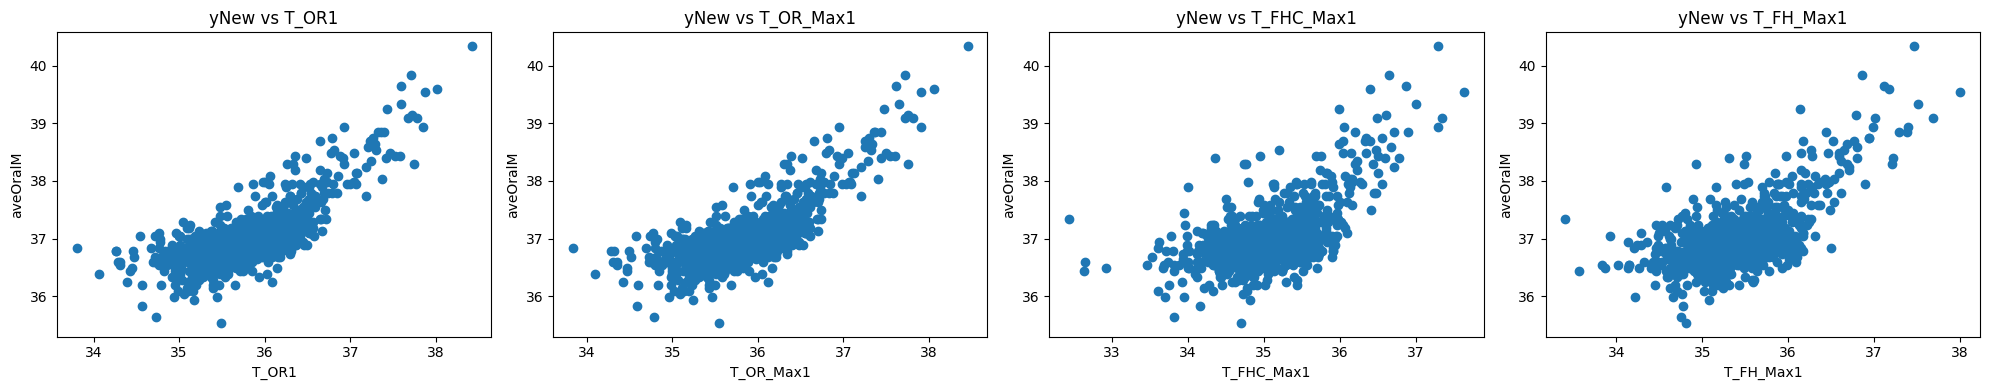

In [ ]:
# Plotting yNew against each of the four features in XNew
fig, axes = plt.subplots(1, 4, figsize=(20, 4))  # Adjusted to 4 features

for i, feature in enumerate(XNew.columns):
    axes[i].scatter(XNew[feature], yNew)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('aveOralM')
    axes[i].set_title(f'yNew vs {feature}')

plt.tight_layout()
plt.show()

The **RobustScaler** scales the features by removing the median and dividing by the interquartile range (IQR), making it robust to outliers. Since the original features are in the range of 0 to 40, this scaling ensures that the features are standardized without being affected by outliers, and the resulting scaled values can be effectively compared.

For each feature $X_i$:
$$
X_{\text{scaled}} = \frac{X_i - \text{median}(X_i)}{\text{IQR}(X_i)}
$$
Where IQR (Interquartile Range) is the range between the 25th and 75th percentiles.

In [ ]:
from sklearn.preprocessing import RobustScaler
import pandas as pd

# Initialize RobustScaler
scaler = RobustScaler()

# Apply RobustScaler to XNew
XNew_scaled = pd.DataFrame(scaler.fit_transform(XNew), columns=XNew.columns)

# Display the first few rows of the scaled dataframe
XNew_scaled.head()

,T_OR1,T_OR_Max1,T_FHC_Max1,T_FH_Max1
0,-0.250254,-0.277387,-1.663178,-1.550562
1,-1.133266,-1.153769,-0.669838,-1.276404
2,0.115972,0.096482,0.186489,-0.085393
3,-1.340793,-1.354774,0.327307,0.377528
4,-0.327569,-0.333668,0.414843,0.044944


Plot (Feature vs. Data Sample Number: the row index)

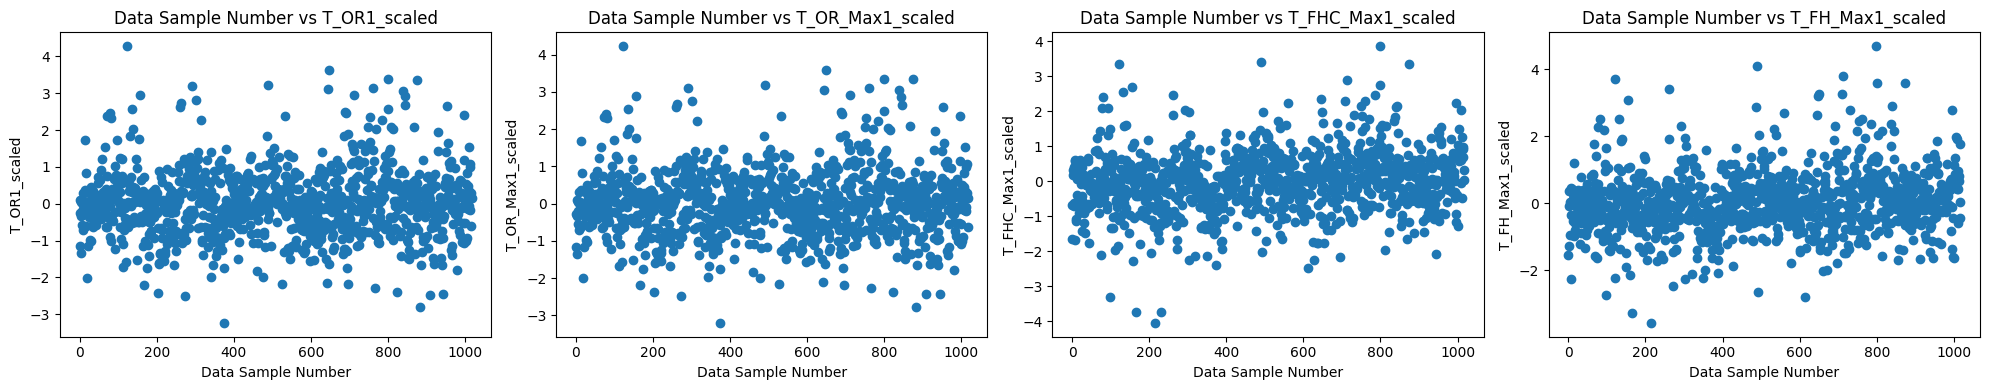

In [ ]:
# Plotting each feature in XNew_scaled against its data sample number (index)
fig, axes = plt.subplots(1, 4, figsize=(20, 4))  # Adjusted to 4 features

for i, feature in enumerate(XNew_scaled.columns):
    axes[i].scatter(XNew_scaled.index, XNew_scaled[feature])
    axes[i].set_xlabel('Data Sample Number')
    axes[i].set_ylabel(f'{feature}_scaled')
    axes[i].set_title(f'Data Sample Number vs {feature}_scaled')

plt.tight_layout()
plt.show()


Plot (Feature vs. aveOralM):

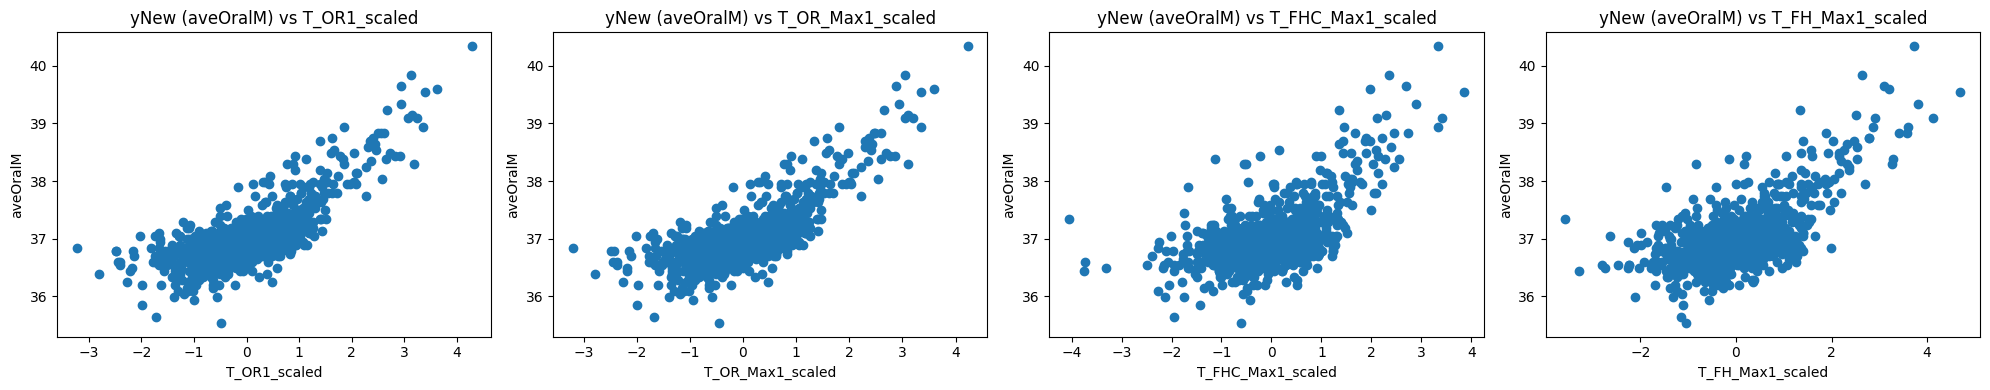

In [ ]:
# Plotting yNew (aveOralM) against each of the scaled features in XNew_scaled
fig, axes = plt.subplots(1, 4, figsize=(20, 4))  # Adjusted to 4 features

for i, feature in enumerate(XNew_scaled.columns):
    axes[i].scatter(XNew_scaled[feature], yNew)
    axes[i].set_xlabel(feature + '_scaled')
    axes[i].set_ylabel('aveOralM')
    axes[i].set_title(f'yNew (aveOralM) vs {feature}_scaled')

plt.tight_layout()
plt.show()


Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(XNew_scaled, yNew, test_size=0.2, random_state=42)


Building the model

In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize the linear regression model
model = LinearRegression()

Training the model

In [ ]:
# Train the model using the training data
model.fit(X_train, y_train)

LinearRegression()

Evaluation of the model

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# Predict on the training data
y_pred_train = model.predict(X_train)

# Predict on the test data
y_pred_test = model.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

# Print the evaluation metrics
print(f"Training MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Training R^2: {train_r2}")
print(f"Test R^2: {test_r2}")

Training MSE: 0.0957917577746669
Test MSE: 0.07805588114890863
Training R^2: 0.6513378726673114
Test R^2: 0.6076047374475761


Clearly, the new model performs better than the previous model. The previous model had a **Training MSE** of **0.1164** and **Test MSE** of **0.1255**, with **Training R²** of **0.5268** and **Test R²** of **0.5976**. In contrast, the new model shows improved performance with a **Training MSE** of **0.0958**, **Test MSE** of **0.0781**, **Training R²** of **0.6513**, and **Test R²** of **0.6076**. The new feature selection (`T_OR1`, `T_OR_Max1`, `T_FHC_Max1`, `T_FH_Max1`) is more effective than the previous one (`Age`, `Distance`, `T_offset1`, `RCC1`, `LCC1`).

The coefficients of each feature

In [ ]:
import pandas as pd

# Extract the coefficients for the independent variables and flatten them
coefficients = model.coef_.flatten()

# Create a DataFrame to display the coefficients alongside the feature names
coef_df = pd.DataFrame({
    'Feature': XNew_scaled.columns,
    'Coefficient': coefficients
})

# Display the coefficients
print(coef_df)


      Feature  Coefficient
0       T_OR1     0.126228
1   T_OR_Max1     0.216535
2  T_FHC_Max1    -0.054993
3   T_FH_Max1     0.209464


## 3.10 Calculating the  evaluation parameters

In [ ]:
import numpy as np
import statsmodels.api as sm

# Reset indices of X_train and y_train to ensure alignment
X_train_sm = sm.add_constant(X_train.reset_index(drop=True))  # Resetting the index of X_train
y_train_sm = y_train.reset_index(drop=True)  # Resetting the index of y_train

# Fit the model using OLS (Ordinary Least Squares) from statsmodels
ols_model = sm.OLS(y_train_sm, X_train_sm).fit()

# Predictions on the test set (for RSS and RSE calculations)
y_pred_test = model.predict(X_test)

# Summary of the OLS model (for standard error, t-statistic, p-value)
print("\nOLS Model Summary:")
print(ols_model.summary())

# Extracting Standard Error, t-statistics, and p-values for each feature
standard_errors = ols_model.bse
t_statistics = ols_model.tvalues
p_values = ols_model.pvalues


OLS Model Summary:
                            OLS Regression Results                            
Dep. Variable:               aveOralM   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     377.8
Date:                Mon, 09 Sep 2024   Prob (F-statistic):          2.11e-183
Time:                        09:07:00   Log-Likelihood:                -200.37
No. Observations:                 814   AIC:                             410.7
Df Residuals:                     809   BIC:                             434.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.0098      0.012

In [ ]:
import numpy as np
import statsmodels.api as sm

# Reset indices of X_train and y_train to ensure alignment
X_train_sm = sm.add_constant(X_train.reset_index(drop=True))  # Resetting the index of X_train
y_train_sm = y_train.reset_index(drop=True)  # Resetting the index of y_train

# Fit the model using OLS (Ordinary Least Squares) from statsmodels
ols_model = sm.OLS(y_train_sm, X_train_sm).fit()

# Predictions on the test set (for RSS and RSE calculations)
y_pred_test = model.predict(X_test)

---

### **1. Residual Sum of Squares (RSS)**

#### **Equation and Short Explanation:**
$$
\text{RSS} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$
- **Explanation:** RSS is the sum of the squared differences between the actual values (\(y_i\)) and the predicted values (\(\hat{y}_i\)). It measures the total deviation of the response variable from the fitted regression line. Lower RSS means a better fit.

- **Implementation:**


In [ ]:
# Residual Sum of Squares (RSS)
RSS = np.sum((y_test - y_pred_test) ** 2)
print(f"Residual Sum of Squares (RSS): {RSS}")

Residual Sum of Squares (RSS): aveOralM    15.9234
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


---

### **2. Residual Standard Error (RSE)**

#### **Equation and Short Explanation:**
$$
\text{RSE} = \sqrt{\frac{\text{RSS}}{n - p - 1}}
$$
- **Explanation:** RSE provides an estimate of the standard deviation of the residuals (errors). It adjusts RSS by the number of data points (\(n\)) and the number of features (\(p\)) to give a measure of how much the predicted values typically deviate from the actual values.

- **Implementation:**


In [ ]:
# Residual Standard Error (RSE)
n = len(y_test)  # Number of data points
p = X_test.shape[1]  # Number of features
RSE = np.sqrt(RSS / (n - p - 1))
print(f"Residual Standard Error (RSE): {RSE}")

Residual Standard Error (RSE): aveOralM    0.282873
dtype: float64


---

### **3. Mean Squared Error (MSE)**

#### **Equation and Short Explanation:**
$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$
- **Explanation:** MSE is the average of the squared differences between the actual and predicted values. It provides a measure of how well the regression model is performing, with lower values indicating better performance.

- **Implementation:**


In [ ]:
# Mean Squared Error (MSE)
MSE = np.mean((y_test - y_pred_test) ** 2)
print(f"Mean Squared Error (MSE): {MSE}")

Mean Squared Error (MSE): 0.07805588114890863


---

### **4. R-squared (R²) Statistic**

#### **Equation and Short Explanation:**
$$
R^2 = 1 - \frac{\text{RSS}}{\text{TSS}}, \quad \text{TSS} = \sum_{i=1}^{n} (y_i - \bar{y})^2
$$
- **Explanation:** R² measures the proportion of the variance in the dependent variable that is predictable from the independent variables. A value closer to 1 indicates a better fit.

- **Implementation:**

In [ ]:
# R-squared (R²) Statistic
TSS = np.sum((y_test - np.mean(y_test)) ** 2)
R_squared = 1 - (RSS / TSS)
print(f"R-squared (R²): {R_squared}")

R-squared (R²): aveOralM    0.607605
dtype: float64


---

### **5. Standard Error for Each Feature**

#### **Equation and Short Explanation:**
$$
\text{SE}(\hat{\beta}_j) = \frac{\hat{\sigma}}{\sqrt{\sum (X_j - \bar{X}_j)^2}}
$$
- **Explanation:** The standard error measures the accuracy with which a sample distribution represents the true population. A smaller standard error indicates more precise estimates for the regression coefficients.

- **Implementation:**

In [ ]:
# Standard Error for each feature
standard_errors = ols_model.bse
print("\nStandard Errors for each feature:")
for feature, se in zip(XNew_scaled.columns, standard_errors[1:]):  # [1:] skips the intercept
    print(f"{feature}: {se}")


Standard Errors for each feature:
T_OR1: 0.5483826352425681
T_OR_Max1: 0.5537006858888935
T_FHC_Max1: 0.028622526603597744
T_FH_Max1: 0.027006212574507676


---

### **6. t-statistic for Each Feature**

#### **Equation and Short Explanation:**
$$
t_j = \frac{\hat{\beta}_j}{\text{SE}(\hat{\beta}_j)}
$$
- **Explanation:** The t-statistic tests whether a coefficient is significantly different from zero. A larger absolute t-statistic indicates that the feature is more likely to be a meaningful predictor.

- **Implementation:**

In [ ]:
# t-statistics for each feature
t_statistics = ols_model.tvalues
print("\nt-statistics for each feature:")
for feature, t_stat in zip(XNew_scaled.columns, t_statistics[1:]):  # [1:] skips the intercept
    print(f"{feature}: {t_stat}")


t-statistics for each feature:
T_OR1: 0.23018254988083564
T_OR_Max1: 0.3910685273806129
T_FHC_Max1: -1.9213037621542028
T_FH_Max1: 7.75613813658415



---

### **7. p-value for Each Feature**

#### **Equation and Short Explanation:**
- The **p-value** is computed from the t-statistic and indicates the probability that the observed data could occur under the null hypothesis (that the coefficient is zero). A smaller p-value (usually < 0.05) suggests that the feature is statistically significant.

- **Implementation:**

In [ ]:
# p-values for each feature
p_values = ols_model.pvalues
print("\np-values for each feature:")
for feature, p_value in zip(XNew_scaled.columns, p_values[1:]):  # [1:] skips the intercept
    print(f"{feature}: {p_value}")


p-values for each feature:
T_OR1: 0.8180081112907768
T_OR_Max1: 0.6958495517079573
T_FHC_Max1: 0.05504450887252779
T_FH_Max1: 2.6339932537041413e-14


---

## 3.11 Discarding features based on p-value:

**Explanation:**

In regression analysis, the **p-value** helps us determine whether a feature is statistically significant in predicting the dependent variable. Typically, a p-value threshold of **0.05** is used:
- If the **p-value < 0.05**, the feature is considered **statistically significant**.
- If the **p-value ≥ 0.05**, the feature is **not statistically significant**, meaning it may not contribute much to the model's predictive power and could potentially be discarded.

**Analysis of p-values:**

- **T_OR1 (p-value = 0.8180):** This feature has a very high p-value (0.818), indicating that it is not statistically significant. It could likely be discarded from the model.
- **T_OR_Max1 (p-value = 0.6958):** This feature also has a high p-value (0.6958), suggesting it is not statistically significant and could potentially be discarded.
- **T_FHC_Max1 (p-value = 0.0550):** The p-value here is close to 0.05. While it is not quite statistically significant at the strict 0.05 level, it is marginally close. It may still hold some value depending on the context.
- **T_FH_Max1 (p-value = 2.63e-14):** This feature has an extremely low p-value, far below 0.05. It is highly statistically significant and should be kept in the model.

**Answer:**

- **T_OR1** and **T_OR_Max1** have high p-values and can likely be discarded as they are not statistically significant.
- **T_FHC_Max1** is borderline, so it could be further evaluated based on other model performance metrics (e.g., R²) or domain knowledge.
- **T_FH_Max1** is statistically significant and should **definitely be retained** in the model.

---

# **4. Performance Evaluation of Linear Regression**

## 1] The two linear regression models, A and B:
 In this section, we compare A and B models using residual standard error (RSE) and R-squared (R²) values based on the given SSE and TSS table.

## 2] Residual Standard Error (RSE)
RSE is calculated using the formula:

$$
RSE = \sqrt{\frac{SSE}{N - d - 1}}
$$

Where:
- $SSE$ is the Sum of Squared Errors.
- $N$ is the number of data samples.
- $d$ is the number of independent features.

Using the given values:
- **For Model A :**  $SSE = 9$, $N = 10000 $, and $ d = 2 $ (since there are two independent variables).
  
$$
RSE_A = \sqrt{\frac{9}{10000 - 2 - 1}} = \sqrt{\frac{9}{9997}} \approx 0.03
$$

- **For Model B :** $ SSE = 2 $, $ N = 10000 $, and $ d = 4 $ (since there are four independent variables).

$$
RSE_B = \sqrt{\frac{2}{10000 - 4 - 1}} = \sqrt{\frac{2}{9995}} \approx 0.014
$$

Thus, **Model B** has a lower RSE and performs better based on this metric.

## 3] R-squared (R²)
R² is calculated as:

$$
R^2 = 1 - \frac{SSE}{TSS}
$$

Where:
- $ TSS $ is the Total Sum of Squares.

Using the given values:
- **For Model A :** $ SSE = 9 $, $ TSS = 90 $
  
$$
R^2_A = 1 - \frac{9}{90} = 1 - 0.1 = 0.9
$$

- **For Model B :** $ SSE = 2 $, $ TSS = 10 $

$$
R^2_B = 1 - \frac{2}{10} = 1 - 0.2 = 0.8
$$

Based on R², **Model A** performs better.

## 4] Conclusion:

- RSE suggests that **Model B** performs better as it has a lower error.
- R² suggests that **Model A** performs better, capturing more variance.
- When comparing two models with the same large dataset size (10,000 samples in this case), **R-squared (R²)** is the more fair and reliable metric. This is because R² accounts for the proportion of variance explained by the model, making it independent of dataset size and the scale of errors. On the other hand, **RSE** does not account for the inherent size of the data and can result in higher error values for larger datasets, leading to potentially misleading conclusions. Thus Model A can cosider as the better one, since R² provides a better comparative insight into model performance, especially for large datasets.

# **5. Linear Regression Impact on Outliers**

Linear regression is sensitive to outliers because it minimizes the sum of squared residuals. Large residuals (outliers) can disproportionately influence the fitting the model.

## 1] Modified Loss Functions
To reduce the impact of outliers, two modified loss functions $ L1(w) $ and $ L2(w) $ are introduced. Both functions include a hyperparameter $ a $ that controls the influence of outliers.


### Behavior of Loss Functions Compared to Standard Square Loss

The **Standard Square Loss** (also known as Mean Squared Error or MSE) is given by the following equation:

$$
\text{MSE}(w) = \frac{1}{N} \sum_{i=1}^{N} (r_i)^2
$$

Where:
- $ N $ is the number of data points,
- $ r_i $ is the residual or error between the predicted and actual values.


1. **$L1(w)$ Function:**

$$
L1(w) = \frac{1}{N} \sum_{i=1}^{N} \frac{r_i^2}{a^2 + r_i^2}
$$

- For small residuals $(r_i)$, $L1(w)$ behaves similarly to the standard square loss.
- For large residuals, $L1(w)$ reduces the influence more gradually, as $r_i^2$ becomes relatively smaller compared to $a^2$, effectively limiting the impact of large outliers.


2. **$L2(w)$ Function:**

$$
L2(w) = \frac{1}{N} \sum_{i=1}^{N} \left( 1 - \exp\left(-2 \frac{|r_i|}{a}\right) \right)
$$

- For small residuals, $L2(w)$ mimics the behavior of the standard square loss.
- For large residuals, $L2(w)$ quickly diminishes their impact by exponentially reducing the influence, making it highly robust to outliers compared to the standard square loss.


## Influence of Parameter $ a $

## 2]  What happens when a → 0


Considering $ L_1(w) $, we see that as $ a \to 0 $, the equation for the loss:

$$
L_1(w) = \frac{1}{N} \sum_{i=1}^{N} \left( \frac{r_i^2}{a^2 + r_i^2} \right)
$$

The limit of $ L_1(w) $ as $ a \to 0 $ is:

$$
\lim_{a \to 0} L_1(w) = \frac{1}{N} \sum_{i=1}^{N} \left( \frac{r_i^2}{r_i^2} \right) = \frac{1}{N} \sum_{i=1}^{N} 1 = 1
$$

When the residual $ r_i $ is large relative to $ a $, as $ a \to 0 $, more residuals exhibit this behavior, and the loss for most residuals approaches 1.

Similarly, considering $ L_2(w) $, the equation for the loss is:

$$
L_2(w) = \frac{1}{N} \sum_{i=1}^{N} \left( 1 - \exp \left( -\frac{2|r_i|}{a} \right) \right)
$$

The limit of $ L_2(w) $ as $ a \to 0 $ is:

$$
\lim_{a \to 0} L_2(w) = \frac{1}{N} \sum_{i=1}^{N} \left( 1 - \exp \left( -\frac{2|r_i|}{a} \right) \right) = \frac{1}{N} \sum_{i=1}^{N} 1 = 1
$$

### Conclusion

Thus, as $ a \to 0 $, both $ L_1(w) $ and $ L_2(w) $ approach 1, indicating that the loss becomes constant and insensitive to residuals, in contrast to standard loss functions, which increase indefinitely with residual size.

## 3] **Minimizing influence for $ |r_i| \geq 40 $**:


To minimize the impact of residuals greater than or equal to 40, we can select $5 \leq a \leq 30$ with $L_1(w)$. This is because, for non outlier larger residuals, $L_1(w)$ produces a lower loss compared to $L_2(w)$. When the residual $|r_i|$ reaches 40, we want the loss to remain at 1 and not increase further for larger residuals. For $a$ values smaller than 5, it considers small residuals, even those smaller than 20 — as outliers, with the maximum loss value of 1. When $a$ exceeds 30, even outliers greater than 40 receive low loss values below 0.6.


Here according to the given graph L1(w) with a=25 performs better for this.

### Test:

In [4]:
import numpy as np

# Example data
residuals = np.array([12, -2.3, 27, 5.5, 70])  # Example residuals
a = 25  # Parameter 'a' for L1 and L2

# Standard Square Loss (Mean Squared Error)
def mse_loss(residuals):
    return np.mean(residuals ** 2)

# L1(w) Loss Function
def l1_loss(residuals, a):
    return np.mean((residuals ** 2) / (a ** 2 + residuals ** 2))

# L2(w) Loss Function
def l2_loss(residuals, a):
    return np.mean(1 - np.exp(-2 * np.abs(residuals) / a))

# Calculate each loss
mse = mse_loss(residuals)
l1 = l1_loss(residuals, a)
l2 = l2_loss(residuals, a)

print(f"Standard Square Loss (MSE): {mse}")
print(f"L1(w) Loss: {l1}")
print(f"L2(w) Loss: {l2}")

Standard Square Loss (MSE): 1161.708
L1(w) Loss: 0.33341945585343397
L2(w) Loss: 0.6044223808721059


This implementation demonstrates L1(w) with a=25 performs better than MSE and L2(w) with residuals set [12, -2.3, 27, 5.5, 70] where I added outlier 70.

### Python Code Implementations for Each Loss Function

Here is a code snippet that implements the **Standard Square Loss**, **$L1(w)$**, and **$L2(w)$** functions.


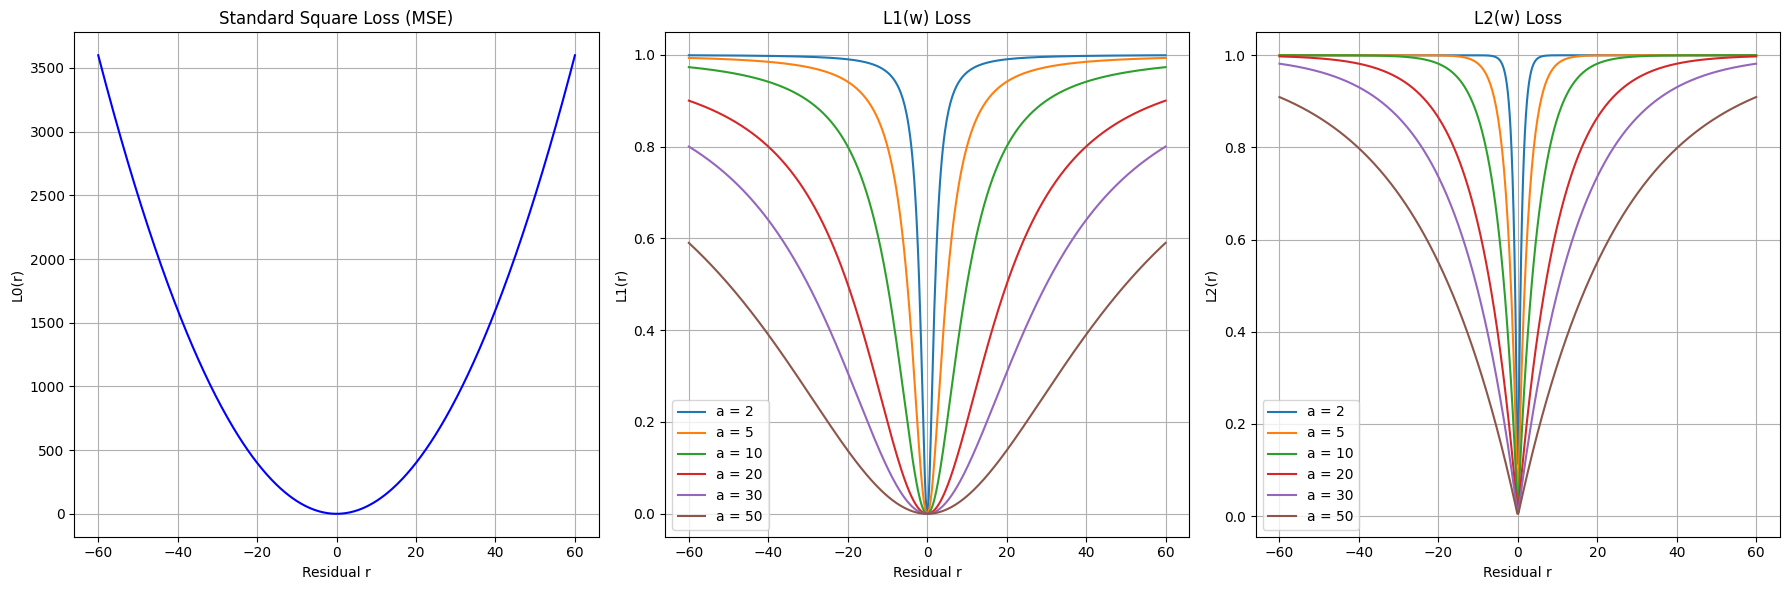

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define r values from -60 to 60
r_values = np.linspace(-60, 60, 500)

# Standard Square Loss (MSE)
def mse_loss(r_values):
    return r_values ** 2

# L1(w) Loss Function
def l1_loss(r_values, a):
    return (r_values ** 2) / (a ** 2 + r_values ** 2)

# L2(w) Loss Function
def l2_loss(r_values, a):
    return 1 - np.exp(-2 * np.abs(r_values) / a)

# Values of 'a' for L1 and L2 losses
a_values = [2, 5, 10, 20, 30, 50]

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot Standard Square Loss (MSE) on the first subplot
axs[0].plot(r_values, mse_loss(r_values), label="MSE", color="blue")
axs[0].set_title("Standard Square Loss (MSE)")
axs[0].set_xlabel("Residual r")
axs[0].set_ylabel("L0(r)")
axs[0].grid(True)

# Plot L1(w) Loss for different values of 'a' on the second subplot
for a in a_values:
    axs[1].plot(r_values, l1_loss(r_values, a), label=f"a = {a}")
axs[1].set_title("L1(w) Loss")
axs[1].set_xlabel("Residual r")
axs[1].set_ylabel("L1(r)")
axs[1].grid(True)
axs[1].legend()

# Plot L2(w) Loss for different values of 'a' on the third subplot
for a in a_values:
    axs[2].plot(r_values, l2_loss(r_values, a), label=f"a = {a}")
axs[2].set_title("L2(w) Loss")
axs[2].set_xlabel("Residual r")
axs[2].set_ylabel("L2(r)")
axs[2].grid(True)
axs[2].legend()

# Display the plots
plt.tight_layout()
plt.show()